In [50]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
from pymc3.gp.util import plot_gp_dist
#import matplotlib.cm as cmap

import numpy as np
import scipy as sp
import pandas as pd
import geopandas as gpd
np.random.seed(42)

import theano
import theano.tensor as tt
import pymc3 as pm

import pickle

pm.__version__

'3.6'

In [51]:
pkl_file = open('full_df.pkl', 'rb')

df = pickle.load(pkl_file)

pkl_file.close()

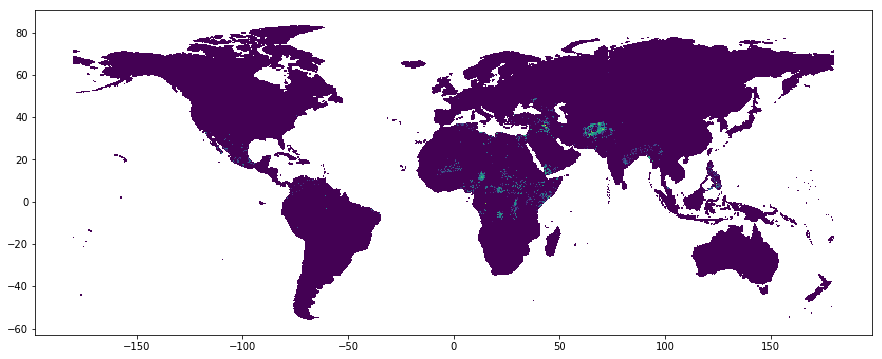

In [52]:
df[df['year']==2017].plot(column = 'log_best', figsize=(15, 15))
plt.show()

### Test gids:  
- none-zeroes: 209956, 194077 ,182658, 182659, 182656
- zeroes: 182656, 182320, 209950, 209930, 209730

In [53]:
df[df['gid'] == 182600]

,gid,xcoord,ycoord,col,row,geometry,year,gwno,best,log_best
864968,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2013,640.0,0.0,0.0
864969,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2014,640.0,0.0,0.0
864970,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2012,640.0,0.0,0.0
864971,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2010,640.0,0.0,0.0
864972,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2011,640.0,0.0,0.0
864973,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2009,640.0,0.0,0.0
864974,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2008,640.0,0.0,0.0
864975,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2007,640.0,0.0,0.0
864976,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2004,640.0,0.0,0.0
864977,182600,39.75,36.75,440.0,254.0,"POLYGON ((39.5 36.5, 39.5 37, 40 37, 40 36.5, ...",2006,640.0,0.0,0.0


In [54]:
gid_list =  [209956, 194077, 182658, 182659, 182656, 182600, 182320, 209950, 209930, 209730]

#gid_list =  [209956, 194077, 182658, 182659, 182656] # only pos test

df_sorted = df[df['gid'].isin(gid_list)].sort_values(['gid','year'])

In [55]:
X = np.array(df_sorted['year']).reshape(-1,1)
#X = df_sorted['year'].copy()

y = np.array(df_sorted['log_best'])
#y = df_sorted['best'].copy() # try with log(best) as well

# you need to add a little bit of noise to y!
y = y + np.random.normal(0,0.1,len(y))

# index
index = np.array(df_sorted['gid'])

# new values from x=1989 to x=2020

max_forcast_year = 2021
X_new = np.linspace(df_sorted['year'].min(), max_forcast_year, 100)[:,None]

# Just for plotting
pred_years =  np.arange(df_sorted['year'].max(), max_forcast_year, 1)



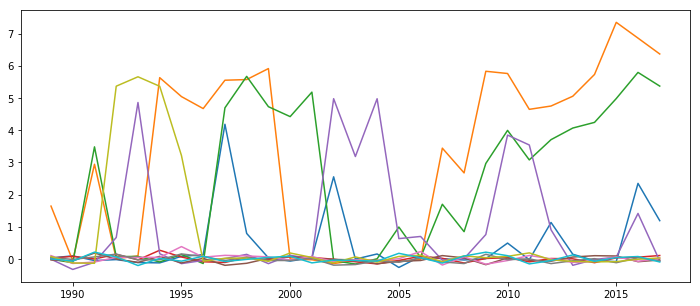

In [56]:
fig = plt.figure(figsize=(12,5))

for i in set(index):
    plt.plot(X[index == i],y[index==i])
    
plt.show()

**Change to log, reduse noise to 0.1**

# Plot function

In [57]:
def index_plot():
    #plot the results
    fig = plt.figure(figsize=(12,5))
    ax = fig.gca()


    for i, j in enumerate(set(index)):
        func_id = 'f_pred' + str(i)
        y_id = 'y_pred' + str(i)

        #palette = sns.cubehelix_palette(8, start=i, rot=0,  light=0.8, dark=0.2, as_cmap = True)
        
        color = 'C' + str(i)[0] # reiterates after 9
        palette = sns.light_palette(color, as_cmap = True)
        
        plot_gp_dist(ax, pred_samples[func_id], X_new, palette = palette, fill_alpha=0.1, samples_alpha=0.1)
        plot_gp_dist(ax, y_samples[y_id], X_new, plot_samples=False, palette = palette, fill_alpha=0.1, samples_alpha=0.1)
        plt.plot(X[index == j], y[index == j], 'o', color = color , ms=6, alpha=0.8) 

    # mics: ---------------------------------------------------------------------------------------------------------

    # prediction line
    plt.vlines(X.max(),0,y.max()*2, linestyles='dashed', color = 'gray', label='Last observed year: ' + str(X.max()))

    fill_min = pred_years.min()
    fill_max = pred_years.max() + 2
    fill_range = np.arange(fill_min, fill_max, 1)

    plt.fill_between(fill_range,y.min(),y.max()*2, color = 'gray', alpha = 0.1, label = 'Forcastings')

    # axis labels and title
    plt.xlabel("Year")
    plt.ylabel('Conflict fatalities')
    plt.title("Posterior distribution over $y_*$ at the observed values"); plt.legend()

    plt.ylim(0,y.max()*1.2)
    plt.xlim(X_new.min(), X_new.max())
    plt.legend(frameon = False, loc = 9)
    #sns.despine()

    #plt.savefig('GP_forcasting_test.png', bbox_inches='tight')

    plt.show()

# separete

In [58]:
with pm.Model() as model:
      
    dim = len(set(index))

    ℓ = pm.Gamma("ℓ", alpha=2, beta=2, shape = dim)
    η = pm.HalfCauchy("η", beta=5, shape = dim)
 
    σ = pm.HalfCauchy("σ", beta=5, shape = dim)
    
    
    gp_list = []

    for i, j in enumerate(set(index)):
        cov = η[i] **2 * pm.gp.cov.ExpQuad(1, ℓ[i])
        gp = pm.gp.Marginal(cov_func=cov)
        y_ = gp.marginal_likelihood("y" + str(i) + "_", X=X[index == j], y=y[index == j], noise=σ[i])
        
        gp_list.append(gp)
        
    # here since you do not want to find the map of the conditional distributions
    mp = pm.find_MAP()

    
    f_pred_list = []
    y_pred_list = []
    
    for i, j in enumerate(set(index)):

        f_pred = gp_list[i].conditional("f_pred" + str(i), X_new)
        f_pred_list.append(f_pred)
        
        y_pred = gp_list[i].conditional("y_pred" + str(i), X_new, pred_noise = True)
        y_pred_list.append(y_pred)
        
    
    pred_samples = pm.sample_posterior_predictive([mp], vars= f_pred_list, samples=100)
    y_samples = pm.sample_posterior_predictive([mp], vars= y_pred_list, samples=100)

        

/home/polichinel/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -186.02, ||grad|| = 0.0056854: 100%|██████████| 171/171 [00:04<00:00, 39.82it/s] 
100%|██████████| 100/100 [00:30<00:00,  3.24it/s]


In [59]:
mp

{'η': array([1.06623044e+00, 3.25967331e+00, 2.69397855e+00, 8.92670823e-02,
        1.53527265e+00, 3.97704161e-02, 4.36012301e-04, 9.13710860e-02,
        1.69537052e+00, 5.92913007e-05]),
 'η_log__': array([ 0.06412947,  1.18162698,  0.99101912, -2.41612248,  0.42870799,
        -3.22463196, -7.7378401 , -2.3928262 ,  0.52790131, -9.73304796]),
 'σ': array([0.016359  , 1.30333395, 1.09739942, 0.002078  , 1.17414618,
        0.08309177, 0.11757484, 0.00903214, 0.55249112, 0.10531244]),
 'σ_log__': array([-4.11297698,  0.26492556,  0.09294322, -6.17634819,  0.16054123,
        -2.48780965, -2.14068023, -4.70696546, -0.59331792, -2.25082369]),
 'ℓ': array([0.53895011, 2.82834458, 2.47658022, 0.46821435, 1.31479912,
        0.49783608, 0.49962484, 0.4828366 , 1.73326198, 0.5000498 ]),
 'ℓ_log__': array([-0.61813226,  1.03969159,  0.90687866, -0.75882907,  0.27368389,
        -0.69748442, -0.69389777, -0.72807698,  0.55000517, -0.69304759])}

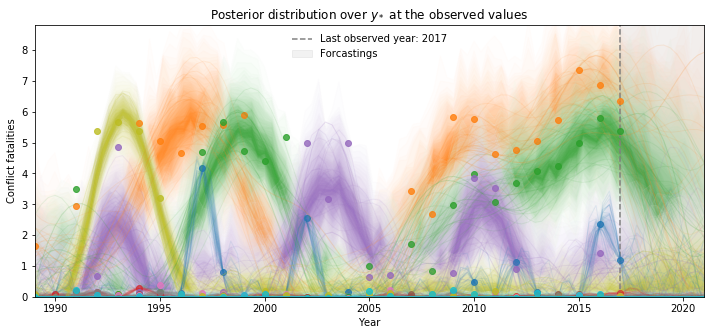

In [60]:
index_plot()

# Shared

In [61]:
with pm.Model() as model:
      
    ℓ = pm.Gamma("ℓ", alpha=2, beta=2, shape = 1)
    η = pm.HalfCauchy("η", beta=5, shape = 1)
    σ = pm.HalfCauchy("σ", beta=5, shape = 1)

    
    gp_list = []

    for i, j in enumerate(set(index)):
        cov = η **2 * pm.gp.cov.ExpQuad(1, ℓ)
        gp = pm.gp.Marginal(cov_func=cov)
        y_ = gp.marginal_likelihood("y" + str(i) + "_", X=X[index == j], y=y[index == j], noise=σ)
        
        gp_list.append(gp)
        
    # here since you do not want to find the map of the conditional distributions
    mp = pm.find_MAP()

    
    f_pred_list = []
    y_pred_list = []
    
    for i, j in enumerate(set(index)):

        f_pred = gp_list[i].conditional("f_pred" + str(i), X_new)
        f_pred_list.append(f_pred)
        
        y_pred = gp_list[i].conditional("y_pred" + str(i), X_new, pred_noise = True)
        y_pred_list.append(y_pred)
        
    
    pred_samples = pm.sample_posterior_predictive([mp], vars= f_pred_list, samples=100)
    y_samples = pm.sample_posterior_predictive([mp], vars= y_pred_list, samples=100)


/home/polichinel/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -469.81, ||grad|| = 0.0080436: 100%|██████████| 13/13 [00:00<00:00, 64.05it/s]  
100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


In [62]:
mp

{'η': array([1.65550598]),
 'η_log__': array([0.50410669]),
 'σ': array([0.77341928]),
 'σ_log__': array([-0.25693397]),
 'ℓ': array([2.45828085]),
 'ℓ_log__': array([0.89946226])}

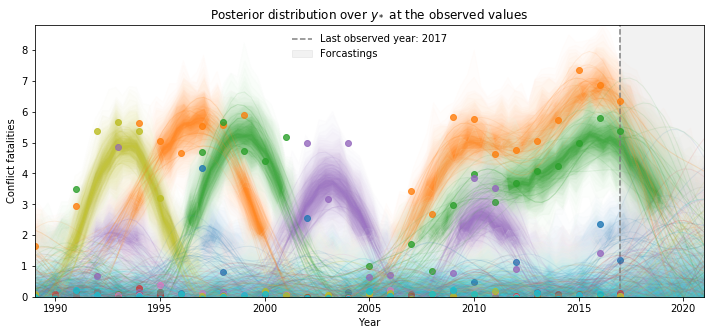

In [63]:
index_plot()

#  Hierarchical ℓ  η, and σ (for-loop for scalable)

In [64]:
with pm.Model() as model:
      
    dim = len(set(index))

    ℓ_β = pm.HalfNormal('ℓ_β', 2)
    η_β = pm.HalfNormal('η_β', 2) #5

    
    ℓ = pm.Gamma("ℓ", alpha=2, beta=ℓ_β, shape = dim)
    η = pm.HalfCauchy("η", beta=η_β, shape = dim)
 
    σ_β = pm.HalfNormal('σ_β', 5)
    σ = pm.HalfCauchy("σ", beta=σ_β, shape = dim)
    
    
    gp_list = []

    for i, j in  enumerate(set(index)):
        cov = η[i] **2 * pm.gp.cov.ExpQuad(1, ℓ[i])
        gp = pm.gp.Marginal(cov_func=cov)
        y_ = gp.marginal_likelihood("y" + str(i) + "_", X=X[index == j], y=y[index == j], noise=σ[i])
        
        gp_list.append(gp)
        
    # here since you do not want to find the map of the conditional distributions
    mp = pm.find_MAP()

    
    f_pred_list = []
    y_pred_list = []
    
    for i, j in enumerate(set(index)):

        f_pred = gp_list[i].conditional("f_pred" + str(i), X_new)
        f_pred_list.append(f_pred)
        
        y_pred = gp_list[i].conditional("y_pred" + str(i), X_new, pred_noise = True)
        y_pred_list.append(y_pred)
        
    
    pred_samples = pm.sample_posterior_predictive([mp], vars= f_pred_list, samples=100)
    y_samples = pm.sample_posterior_predictive([mp], vars= y_pred_list, samples=100)

        

/home/polichinel/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -159.97, ||grad|| = 0.0047476: 100%|██████████| 191/191 [00:03<00:00, 56.40it/s] 
100%|██████████| 100/100 [00:36<00:00,  2.76it/s]


In [65]:
mp

{'η': array([1.03580360e+00, 3.06919743e+00, 2.52595115e+00, 8.91673905e-02,
        1.42609533e+00, 9.20691800e-02, 2.78692439e-05, 9.16831731e-02,
        1.59079216e+00, 1.48768693e-13]),
 'η_log__': array([  0.03517755,   1.1214161 ,   0.92661768,  -2.41723988,
          0.35494017,  -2.38521503, -10.48798685,  -2.38941642,
          0.46423211, -29.53638369]),
 'η_β': array(0.32423665),
 'η_β_log__': array(-1.12628164),
 'σ': array([3.05780504e-31, 1.25008036e+00, 1.04718787e+00, 1.69838955e-19,
        1.12215246e+00, 1.96029918e-04, 1.15376592e-01, 9.38744891e-16,
        5.18321269e-01, 1.03529618e-01]),
 'σ_log__': array([-7.02624405e+01,  2.23207838e-01,  4.61083477e-02, -4.32194363e+01,
         1.15248678e-01, -8.53724327e+00, -2.15955379e+00, -3.46019879e+01,
        -6.57160019e-01, -2.26789754e+00]),
 'σ_β': array(0.10260067),
 'σ_β_log__': array(-2.27691082),
 'ℓ': array([0.53842466, 2.93533623, 2.49947509, 0.47694754, 1.32680981,
        0.42262461, 0.60025656, 0.48994

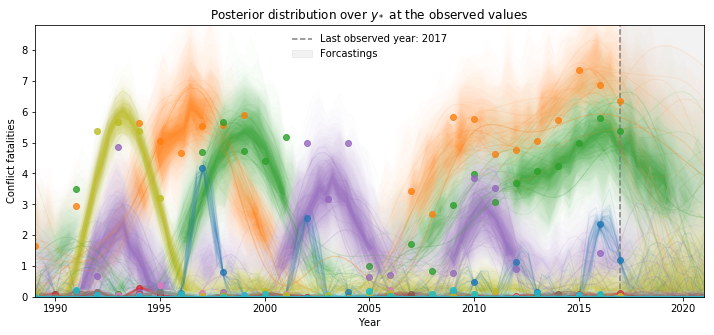

In [66]:
index_plot()

#  Hierarchical  η, and σ. Shared ℓ (for loop for scalability)

In [67]:
with pm.Model() as model:
    
    dim = len(set(index))
    
    η_β = pm.HalfNormal('η_β', 2) #5
    
    ℓ = pm.Gamma("ℓ", alpha=2, beta=2, shape = 1)
    η = pm.HalfCauchy("η", beta=η_β, shape = dim)
    
    σ_β = pm.HalfNormal('σ_β', 5)
    σ = pm.HalfCauchy("σ", beta=σ_β, shape = dim)
    
    gp_list = []

    for i, j in enumerate(set(index)):
        cov = η[i] **2 * pm.gp.cov.ExpQuad(1, ℓ)
        gp = pm.gp.Marginal(cov_func=cov)
        y_ = gp.marginal_likelihood("y" + str(i) + "_", X=X[index == j], y=y[index == j], noise=σ[i])
        
        gp_list.append(gp)
        
    # here since you do not want to find the map of the conditional distributions
    mp = pm.find_MAP()

    
    f_pred_list = []
    y_pred_list = []
    
    for i, j in enumerate(set(index)):

        f_pred = gp_list[i].conditional("f_pred" + str(i), X_new)
        f_pred_list.append(f_pred)
        
        y_pred = gp_list[i].conditional("y_pred" + str(i), X_new, pred_noise = True)
        y_pred_list.append(y_pred)
        
    
    pred_samples = pm.sample_posterior_predictive([mp], vars= f_pred_list, samples=100)
    y_samples = pm.sample_posterior_predictive([mp], vars= y_pred_list, samples=100)

        

/home/polichinel/anaconda3/lib/python3.6/site-packages/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -inf, ||grad|| = 1,968.1: 100%|██████████| 47/47 [00:01<00:00, 42.42it/s]  
  0%|          | 0/100 [00:00<?, ?it/s]/home/polichinel/anaconda3/lib/python3.6/site-packages/scipy/stats/_multivariate.py:651: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)
100%|██████████| 100/100 [00:33<00:00,  3.02it/s]


In [48]:
mp

{'η': array([0.37028644, 3.01018189, 2.45774128, 1.42214873, 1.97423096]),
 'η_log__': array([-0.99347842,  1.10200051,  0.89924275,  0.35216892,  0.68017894]),
 'η_β': array(1.62150447),
 'η_β_log__': array(0.48335441),
 'σ': array([0.94637873, 1.28105119, 1.0212354 , 1.34309385, 0.50877174]),
 'σ_log__': array([-0.05511245,  0.24768098,  0.02101307,  0.2949758 , -0.67575581]),
 'σ_β': array(0.97100726),
 'σ_β_log__': array(-0.02942133),
 'ℓ': array([2.14494653]),
 'ℓ_log__': array([0.76311462])}

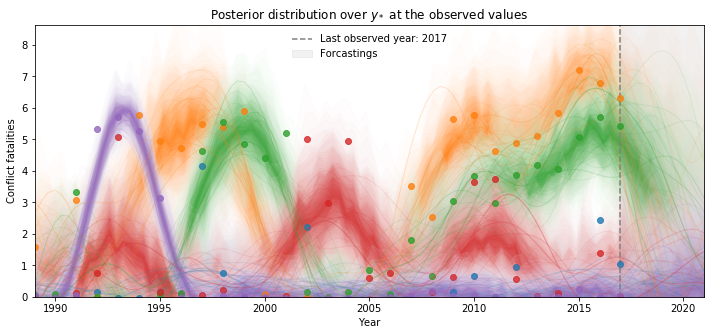

In [49]:
index_plot()